# Analysis

* Capomulin and Ramicane were the only drugs that decreased the tumor size over the treatment. The other drugs treatments all showed a fairly consistent increase in tumor size.
* Capomulin and Ramicane were also the two most useful drugs in reducing metastatic spread, though Stelaysn also showed some promise.
* The error bars present in both the tumor size and metastatic spread studies of Capomulin and Ramicane suggest that further studies are needed as currently there is too much standard deviation to say if either of the previous two observations are actually true.
* Capomulin and Ramicane were also the best at keeping mice alive to the end of the treatment so it does seem likely there is a statistically significant effect. Further statistical analysis is needed because of the small sample size though.


In [18]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import seaborn as sns

In [19]:
#import and read into a data frame
csv='raw_data/clinicaltrial_data.csv'
csv1='raw_data/mouse_drug_data.csv'
a=pd.read_csv(csv)
b=pd.read_csv(csv1)

In [20]:
#Get lists of drugs and time points
c=pd.merge(a,b,on='Mouse ID')
d=c.groupby('Drug')
drugs=d.count().index
e=d.get_group('Capomulin')
g=e.groupby('Timepoint')   
times=g.count().index

In [21]:
#Finds the necessary data
c=pd.merge(a,b,on='Mouse ID')
d=c.groupby('Drug')
tumorpoints=[]
tumorstd=[]
metapoints=[]
metastd=[]
micealive=[]
for i in drugs:
    tumorvolumes=[]
    volstd=[]
    metasites=[]
    sitestd=[]
    miceali=[]
    e=d.get_group(i)
    f=e.groupby('Mouse ID')
    g=e.groupby('Timepoint')   
    for j in times:
        tumorvolumes.append(g.get_group(j)['Tumor Volume (mm3)'].mean())
        volstd.append(stat.stdev(g.get_group(j)['Tumor Volume (mm3)']))
        metasites.append(g.get_group(j)['Metastatic Sites'].mean())
        #Must be done because stdev of integers doesn't work for some reason
        new=[]
        for k in g.get_group(j)['Metastatic Sites']:
            new.append(float(k))
        #------------------------------------------------------------------------#
        sitestd.append(stat.stdev(new))
        miceali.append(g.get_group(j)['Metastatic Sites'].count())
    tumorpoints.append(tumorvolumes)
    tumorstd.append(volstd)
    metapoints.append(metasites)
    micealive.append(miceali)
    metastd.append(sitestd)
#Finds proportion of mice alive
for i in range(len(micealive)):
    k=micealive[i][0]
    for j in range(len(micealive[i])):
        micealive[i][j]=micealive[i][j]/k*100
#Finds change in tumor size 
change=[]
for i in range(len(tumorpoints)):
    change.append((tumorpoints[i][-1]/tumorpoints[i][0]-1)*100)    

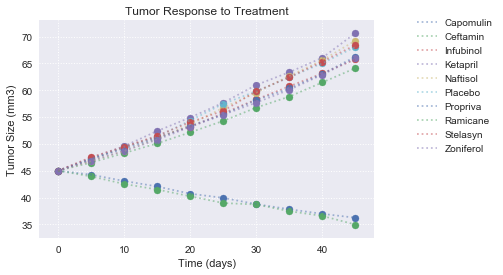

In [22]:
#Tumor Response Graph
sns.set(color_codes=True)
for i in range(len(tumorpoints)):
    plt.scatter(times, tumorpoints[i])
    plt.plot(times,tumorpoints[i],linestyle='dotted',alpha=.5)
plt.legend(drugs,bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Time (days)')
plt.ylabel('Tumor Size (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid(linestyle='dotted')
plt.show()

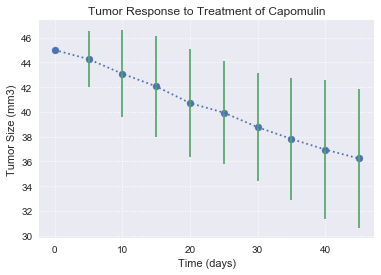

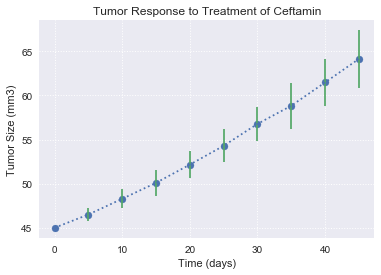

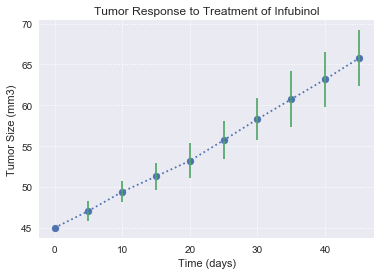

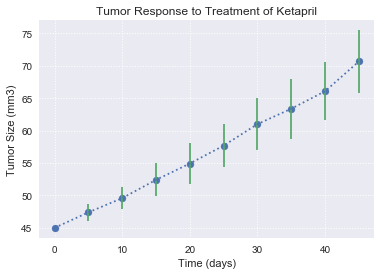

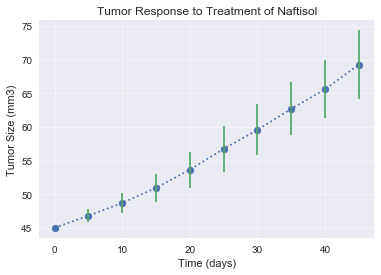

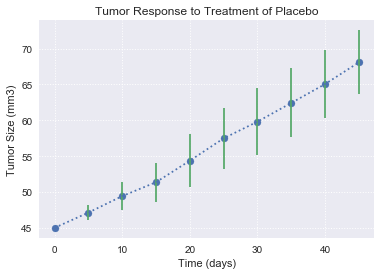

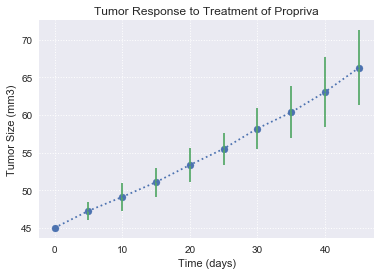

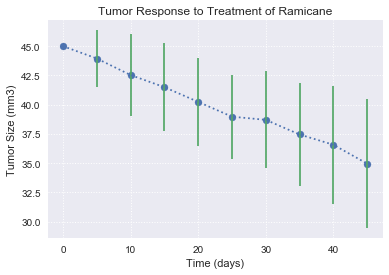

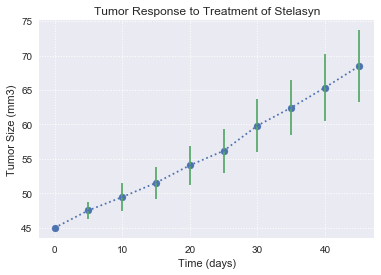

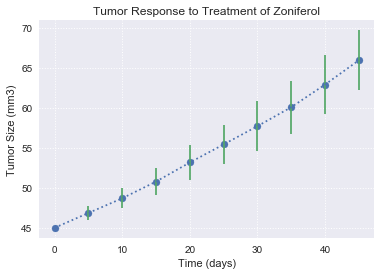

In [23]:
#Tumor Response Error Bars (Can't really see separate points on combined graph with error bars)
for i in range(len(tumorpoints)):
    plt.scatter(times, tumorpoints[i])
    plt.plot(times,tumorpoints[i],linestyle='dotted')
    plt.errorbar(times,tumorpoints[i],yerr=tumorstd[i], linestyle="None")
    plt.xlabel('Time (days)')
    plt.ylabel('Tumor Size (mm3)')
    plt.title(f'Tumor Response to Treatment of {drugs[i]}')
    plt.grid(linestyle='dotted')
    plt.show()

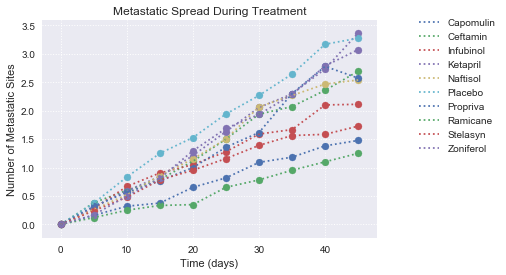

In [24]:
# Metastatic Sites Graph
for i in range(len(metapoints)):
    plt.scatter(times, metapoints[i])
    plt.plot(times,metapoints[i],linestyle='dotted')
plt.legend(drugs,bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Time (days)')
plt.ylabel('Number of Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid(linestyle='dotted')
plt.show()

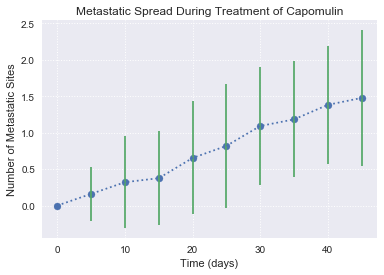

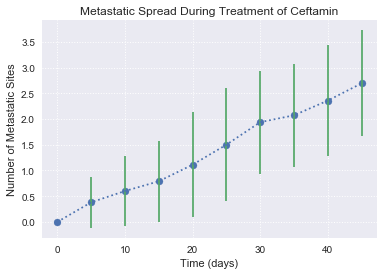

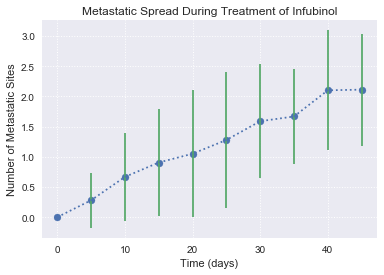

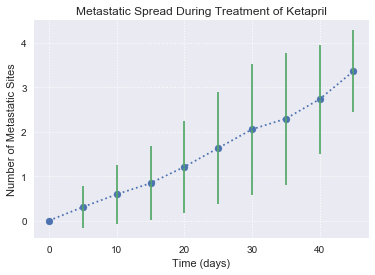

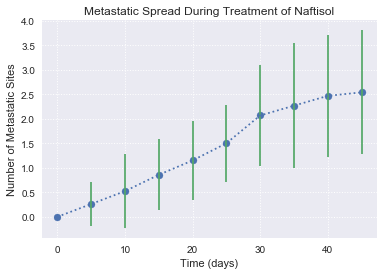

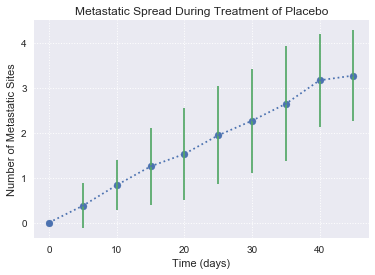

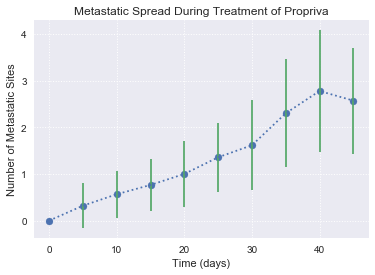

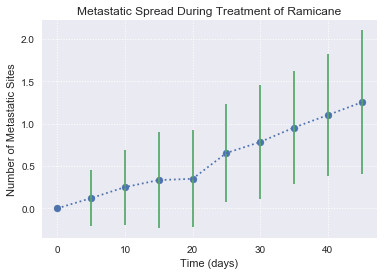

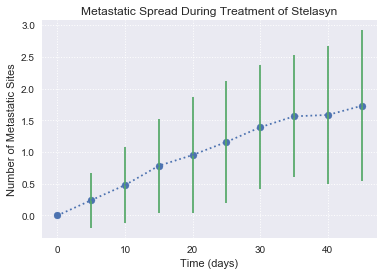

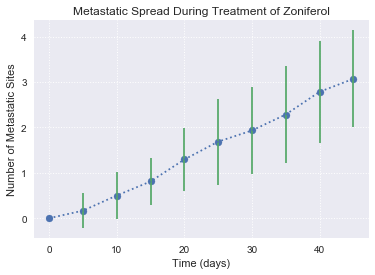

In [25]:
# Metastatic Sites Error Bar Graphs
for i in range(len(metapoints)):
    plt.scatter(times, metapoints[i])
    plt.plot(times,metapoints[i],linestyle='dotted')
    plt.errorbar(times,metapoints[i],yerr=metastd[i], linestyle="None")
    plt.xlabel('Time (days)')
    plt.ylabel('Number of Metastatic Sites')
    plt.title(f'Metastatic Spread During Treatment of {drugs[i]}')
    plt.grid(linestyle='dotted')
    plt.show()

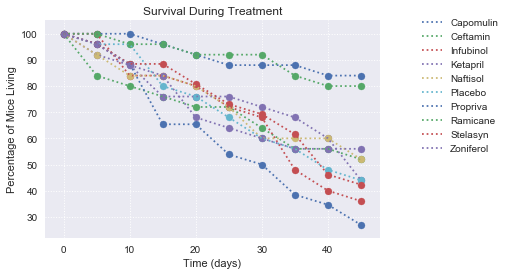

In [26]:
#Survival Rate Graph
for i in range(len(micealive)):
    plt.scatter(times, micealive[i])
    plt.plot(times,micealive[i],linestyle='dotted')
plt.legend(drugs,bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Mice Living')
plt.title('Survival During Treatment')
plt.grid(linestyle='dotted')
plt.show()

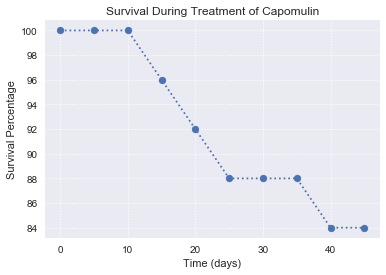

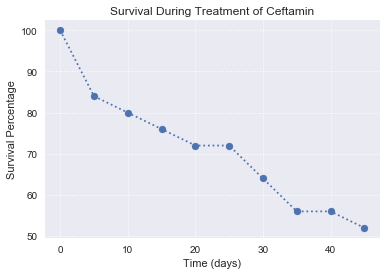

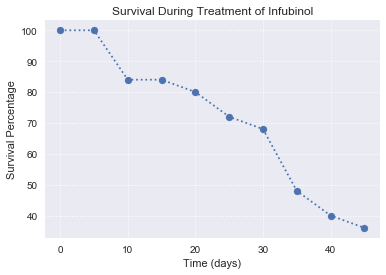

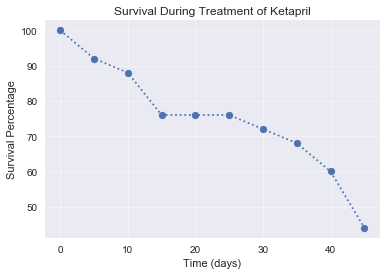

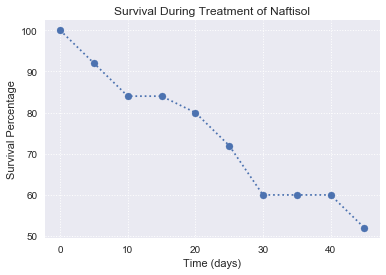

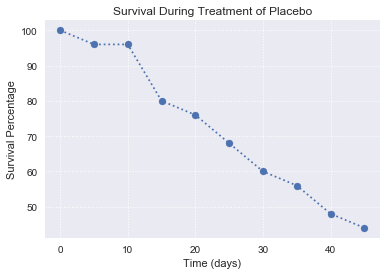

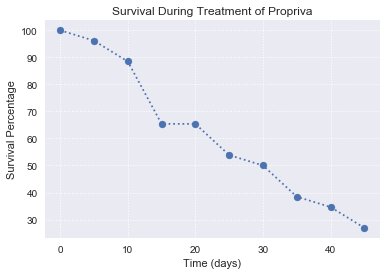

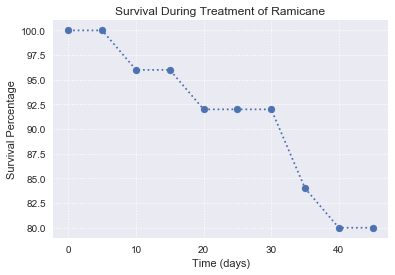

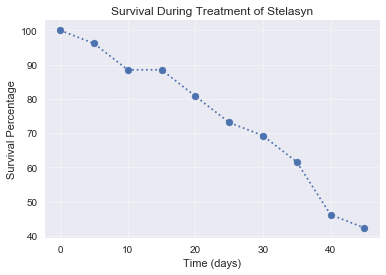

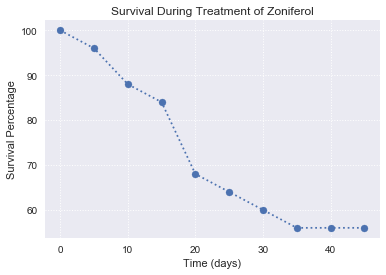

In [27]:
# Each Separate Survival
for i in range(len(metapoints)):
    plt.scatter(times, micealive[i])
    plt.plot(times,micealive[i],linestyle='dotted')
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Percentage')
    plt.title(f'Survival During Treatment of {drugs[i]}')
    plt.grid(linestyle='dotted')
    plt.show()

In [28]:
#A couple of lists needed to make bar graph work
abovezero=[]
for i in change:
    if i>0:
        abovezero.append('g')
    else:
        abovezero.append('r')
strings=[]
for i in change:
    strings.append('{0:.2f}%'.format(i))

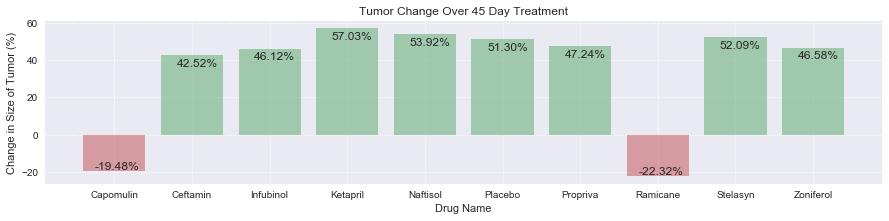

In [29]:
#Tumor Change Graph
plt.figure(figsize=(15,3))
x_axis = np.arange(len(change))
plt.bar(x_axis,change, color=abovezero, align="edge",alpha=.5)
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.xlabel('Drug Name')
plt.ylabel('Change in Size of Tumor (%)')
plt.title('Tumor Change Over 45 Day Treatment')
plt.grid(linestyle='dotted')
for i in range(len(change)):
    if change[i]>0:
        plt.text(x=x_axis[i]+.2,y=change[i]-6,s=strings[i])
    else:
        plt.text(x=x_axis[i]+.15,y=change[i]+1,s=strings[i])
plt.show()
